**Universidad Autónoma Metropolitana - Unidad Iztapalapa (UAM-I)**

**Maestría en Matemáticas Aplicadas e Industriales (MCMAI)**

**Taller de Modelado Matemático II - Parte II**

**Profesor**: Dr. Joaquín Delgado Fernández

**Alumno**: Alan Badillo Salas

Julio 16, 2025. Trimestre 25-P

In [ ]:
import pandas

iris = pandas.read_csv("iris.csv")

iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
X = iris[["sepal.length", "sepal.width", "petal.length", "petal.width"]]

X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y = pandas.get_dummies(iris["variety"])

y.head()

,Setosa,Versicolor,Virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=123)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112, 3), (38, 3))

In [ ]:
import keras

model = keras.Sequential([
    keras.layers.Input(shape=(4,)),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(3, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model

<Sequential name=sequential, built=True>

In [ ]:
model.fit(X_train, y_train, batch_size=50, epochs=200)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8207 - loss: 0.4391
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8112 - loss: 0.4512 
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8062 - loss: 0.4383
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8388 - loss: 0.4214
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8232 - loss: 0.4520
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8171 - loss: 0.4565
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8496 - loss: 0.4328
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8516 - loss: 0.4521
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8416 - loss: 0.4431
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8336 - loss: 0.4499
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8516 - loss: 0.4294 
Epoch 12/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8296 - 

In [ ]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9720 - loss: 0.2746


[0.2712377905845642, 0.9736841917037964]

La precisión alcanzada es del 92%

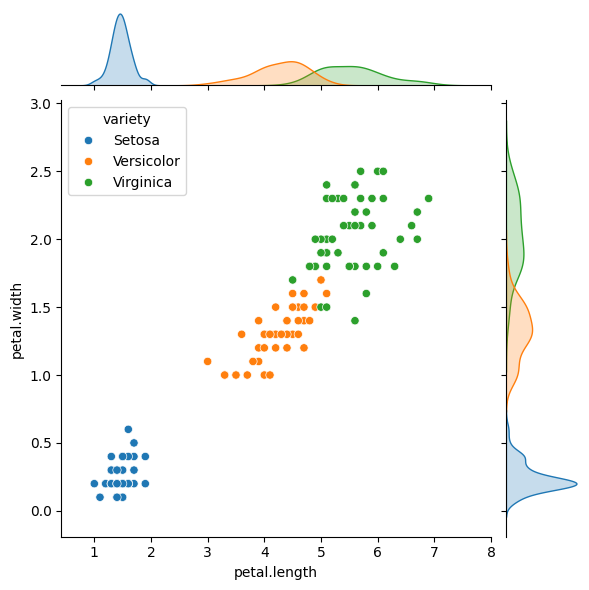

In [ ]:
import seaborn

seaborn.jointplot(iris, x="petal.length", y="petal.width", hue="variety")

/tmp/ipython-input-43-333629404.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  pyplot.legend()


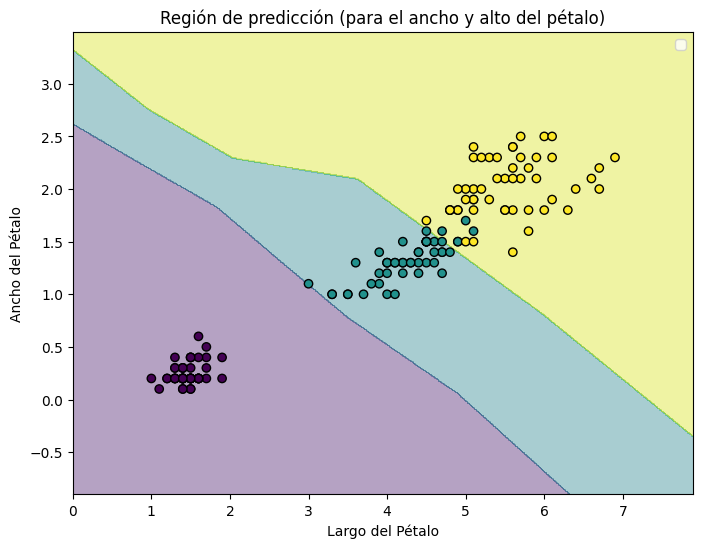

In [ ]:
import numpy
import matplotlib.pyplot as pyplot

X_petalo = X[["petal.length", "petal.width"]]

sepal_length_mean = X["sepal.length"].quantile(0.25)
sepal_width_mean = X["sepal.width"].mean()

h = 0.01
xmin, xmax = X_petalo.values[:, 0].min() - 1, X_petalo.values[:, 0].max() + 1
ymin, ymax = X_petalo.values[:, 1].min() - 1, X_petalo.values[:, 1].max() + 1

Rx, Ry = numpy.meshgrid(numpy.arange(xmin, xmax, h),
                     numpy.arange(ymin, ymax, h))

grid_partial = numpy.c_[Rx.ravel(), Ry.ravel()]

grid_full = numpy.c_[
    numpy.full(grid_partial.shape[0], sepal_length_mean),
    numpy.full(grid_partial.shape[0], sepal_width_mean),
    grid_partial
]

Rp = model.predict(grid_full, verbose=0)
Rp = numpy.argmax(Rp, axis=1).reshape(Rx.shape)

pyplot.figure(figsize=(8, 6))
pyplot.contourf(Rx, Ry, Rp, alpha=0.4)
pyplot.scatter(X["petal.length"], X["petal.width"], c=numpy.argmax(y, axis=1), edgecolors="k")
pyplot.xlabel("Largo del Pétalo")
pyplot.ylabel("Ancho del Pétalo")
pyplot.title("Región de predicción (para el ancho y alto del pétalo)")
pyplot.legend()
pyplot.show()